<a href="https://colab.research.google.com/github/Thasneem-vazim/Final-dataset-depression-detection/blob/main/Final_dataset_Using_Boruta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_rows', None)

In [2]:
depressionDataset = pd.read_csv("/content/final dataset.csv")
X = depressionDataset[['AGERNG','GENDER','EDU','PROF','MARSTS','RESDPL','LIVWTH','ENVSAT','POSSAT','FINSTR','DEBT','PHYEX','SMOKE','DRINK','ILLNESS','PREMED','EATDIS','AVGSLP','INSOM','TSSN','WRKPRE','ANXI','DEPRI','ABUSED','CHEAT','THREAT','SUICIDE','INFER','CONFLICT','LOST']]
y=depressionDataset[['DEPRESSED']]


In [3]:
from sklearn.preprocessing import LabelEncoder
### label encode the categorical values and convert them to numbers
le = LabelEncoder()
le.fit(X['AGERNG'].astype(str))
X['AGERNG'] = le.transform(X['AGERNG'].astype(str))

le = LabelEncoder()
le.fit(X['GENDER'].astype(str))
X['GENDER'] = le.transform(X['GENDER'].astype(str))

le = LabelEncoder()
le.fit(X['EDU'].astype(str))
X['EDU'] = le.transform(X['EDU'].astype(str))

le = LabelEncoder()
le.fit(X['PROF'].astype(str))
X['PROF'] = le.transform(X['PROF'].astype(str))


le = LabelEncoder()
le.fit(X['MARSTS'].astype(str))
X['MARSTS'] = le.transform(X['MARSTS'].astype(str))



le = LabelEncoder()
le.fit(X['RESDPL'].astype(str))
X['RESDPL'] = le.transform(X['RESDPL'].astype(str))



le = LabelEncoder()
le.fit(X['LIVWTH'].astype(str))
X['LIVWTH'] = le.transform(X['LIVWTH'].astype(str))



le = LabelEncoder()
le.fit(X['ENVSAT'].astype(str))
X['ENVSAT'] = le.transform(X['ENVSAT'].astype(str))

le = LabelEncoder()
le.fit(X['POSSAT'].astype(str))
X['POSSAT'] = le.transform(X['POSSAT'].astype(str))



le = LabelEncoder()
le.fit(X['FINSTR'].astype(str))
X['FINSTR'] = le.transform(X['FINSTR'].astype(str))

le = LabelEncoder()
le.fit(X['DEBT'].astype(str))
X['DEBT'] = le.transform(X['DEBT'].astype(str))



le = LabelEncoder()
le.fit(X['PHYEX'].astype(str))
X['PHYEX'] = le.transform(X['PHYEX'].astype(str))




le = LabelEncoder()
le.fit(X['SMOKE'].astype(str))
X['SMOKE'] = le.transform(X['SMOKE'].astype(str))



le = LabelEncoder()
le.fit(X['DRINK'].astype(str))
X['DRINK'] = le.transform(X['DRINK'].astype(str))


le = LabelEncoder()
le.fit(X['ILLNESS'].astype(str))
X['ILLNESS'] = le.transform(X['ILLNESS'].astype(str))




le = LabelEncoder()
le.fit(X['PREMED'].astype(str))
X['PREMED'] = le.transform(X['PREMED'].astype(str))



le = LabelEncoder()
le.fit(X['EATDIS'].astype(str))
X['EATDIS'] = le.transform(X['EATDIS'].astype(str))

le = LabelEncoder()
le.fit(X['AVGSLP'].astype(str))
X['AVGSLP'] = le.transform(X['AVGSLP'].astype(str))



le = LabelEncoder()
le.fit(X['INSOM'].astype(str))
X['INSOM'] = le.transform(X['INSOM'].astype(str))




le = LabelEncoder()
le.fit(X['TSSN'].astype(str))
X['TSSN'] = le.transform(X['TSSN'].astype(str))




le = LabelEncoder()
le.fit(X['WRKPRE'].astype(str))
X['WRKPRE'] = le.transform(X['WRKPRE'].astype(str))




le = LabelEncoder()
le.fit(X['ANXI'].astype(str))
X['ANXI'] = le.transform(X['ANXI'].astype(str))




le = LabelEncoder()
le.fit(X['DEPRI'].astype(str))
X['DEPRI'] = le.transform(X['DEPRI'].astype(str))



le = LabelEncoder()
le.fit(X['ABUSED'].astype(str))
X['ABUSED'] = le.transform(X['ABUSED'].astype(str))




le = LabelEncoder()
le.fit(X['CHEAT'].astype(str))
X['CHEAT'] = le.transform(X['CHEAT'].astype(str))



le = LabelEncoder()
le.fit(X['THREAT'].astype(str))
X['THREAT'] = le.transform(X['THREAT'].astype(str))



le = LabelEncoder()
le.fit(X['SUICIDE'].astype(str))
X['SUICIDE'] = le.transform(X['SUICIDE'].astype(str))


le = LabelEncoder()
le.fit(X['INFER'].astype(str))
X['INFER'] = le.transform(X['INFER'].astype(str))


le = LabelEncoder()
le.fit(X['CONFLICT'].astype(str))
X['CONFLICT'] = le.transform(X['CONFLICT'].astype(str))



le = LabelEncoder()
le.fit(X['LOST'].astype(str))
X['LOST'] = le.transform(X['LOST'].astype(str))
le = LabelEncoder()

le.fit(y['DEPRESSED'].astype(str))
y['DEPRESSED'] = le.transform(y['DEPRESSED'].astype(str))


In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.4 MB/s 


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute

X=X_train.to_numpy()
y=y_train.to_numpy().ravel()

print(type(X))
print(type(y))
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	20
Tentative: 	2
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	20
Tentative: 	2
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	20
Tentative: 	2
Rejected: 	8
Iteration: 	16 /

In [7]:
print(feat_selector.support_)
print(feat_selector.ranking_)

[ True False False  True False False  True  True  True  True False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[ 1  7  4  1  8  5  1  1  1  1  2  3  6  9  9 11  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [8]:

X_trainSelectedFeature=pd.DataFrame()

X_trainSelectedFeature['AGERNG']=X_train['AGERNG']
X_trainSelectedFeature['PROF']=X_train['PROF']
X_trainSelectedFeature['LIVWTH']=X_train['LIVWTH']
X_trainSelectedFeature['ENVSAT']=X_train['ENVSAT']
X_trainSelectedFeature['POSSAT']=X_train['POSSAT']
X_trainSelectedFeature['FINSTR']=X_train['FINSTR']


X_trainSelectedFeature['WRKPRE']=X_train['WRKPRE']
X_trainSelectedFeature['ABUSED']=X_train['ABUSED']
X_trainSelectedFeature['CHEAT']=X_train['CHEAT']
X_trainSelectedFeature['THREAT']=X_train['THREAT']
X_trainSelectedFeature['INFER']=X_train['INFER']
X_trainSelectedFeature['ANXI']=X_train['ANXI']
X_trainSelectedFeature['DEPRI']=X_train['DEPRI']
X_trainSelectedFeature['SUICIDE']=X_train['SUICIDE']
X_trainSelectedFeature['CONFLICT']=X_train['CONFLICT']
X_trainSelectedFeature['EATDIS']=X_train['EATDIS']
X_trainSelectedFeature['AVGSLP']=X_train['AVGSLP']
X_trainSelectedFeature['INSOM']=X_train['INSOM']
X_trainSelectedFeature['TSSN']=X_train['TSSN']
X_trainSelectedFeature['LOST']=X_train['LOST']







In [9]:
X_testSelectedFeature=pd.DataFrame()

X_testSelectedFeature['AGERNG']=X_test['AGERNG']
X_testSelectedFeature['PROF']=X_test['PROF']
X_testSelectedFeature['LIVWTH']=X_test['LIVWTH']
X_testSelectedFeature['ENVSAT']=X_test['ENVSAT']
X_testSelectedFeature['POSSAT']=X_test['POSSAT']
X_testSelectedFeature['FINSTR']=X_test['FINSTR']


X_testSelectedFeature['WRKPRE']=X_test['WRKPRE']
X_testSelectedFeature['ABUSED']=X_test['ABUSED']
X_testSelectedFeature['CHEAT']=X_test['CHEAT']
X_testSelectedFeature['THREAT']=X_test['THREAT']
X_testSelectedFeature['INFER']=X_test['INFER']
X_testSelectedFeature['ANXI']=X_test['ANXI']
X_testSelectedFeature['DEPRI']=X_test['DEPRI']
X_testSelectedFeature['SUICIDE']=X_test['SUICIDE']
X_testSelectedFeature['CONFLICT']=X_test['CONFLICT']
X_testSelectedFeature['EATDIS']=X_test['EATDIS']
X_testSelectedFeature['AVGSLP']=X_test['AVGSLP']
X_testSelectedFeature['INSOM']=X_test['INSOM']
X_testSelectedFeature['TSSN']=X_test['TSSN']
X_testSelectedFeature['LOST']=X_test['LOST']





In [10]:
X_trainSelectedFeature.shape

(1411, 20)

In [11]:
X_testSelectedFeature.shape

(353, 20)

In [12]:
from imblearn.over_sampling import SMOTE
smote=SMOTE('minority',random_state=0)
X_trainSelectedFeatureAfterSMOTE,y_train=smote.fit_resample(X_trainSelectedFeature, y_train)

              precision    recall  f1-score   support

           0       0.65      0.90      0.76       142
           1       0.91      0.67      0.77       211

    accuracy                           0.76       353
   macro avg       0.78      0.79      0.76       353
weighted avg       0.81      0.76      0.77       353



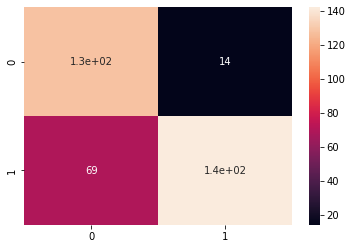

In [13]:
from sklearn.neighbors import KNeighborsClassifier
import time
KNNClassification = KNeighborsClassifier(n_neighbors=7)
KNNClassification.fit(X_trainSelectedFeatureAfterSMOTE,y_train)
y_predict=KNNClassification.predict(X_testSelectedFeature)
from sklearn.metrics import classification_report,confusion_matrix
cm1=confusion_matrix(y_test,y_predict)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y_predict))





AUC KNN:  0.8885755290034043


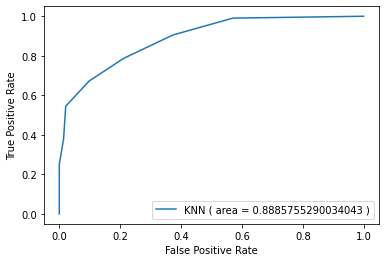

In [14]:
y_predictionKNN_proba=KNNClassification.predict_proba(X_testSelectedFeature)[:,1]
AUCKNN=metrics.roc_auc_score(y_test,y_predictionKNN_proba)
print("AUC KNN: ",AUCKNN)
fprKNN, tprKNN, thresholds = metrics.roc_curve(y_test,y_predictionKNN_proba)

plt.plot(fprKNN,tprKNN,label="KNN ( area = "+str(AUCKNN)+" )")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


In [15]:
prediction=KNNClassification.predict(X_testSelectedFeature)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  76.48725212464589


In [16]:
from sklearn.ensemble import AdaBoostClassifier
ADABoostClassification=AdaBoostClassifier()
ADABoostClassification.fit(X_trainSelectedFeatureAfterSMOTE,y_train)
y_predictionADABoost=ADABoostClassification.predict(X_testSelectedFeature)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       142
           1       0.88      0.86      0.87       211

    accuracy                           0.85       353
   macro avg       0.84      0.84      0.84       353
weighted avg       0.85      0.85      0.85       353



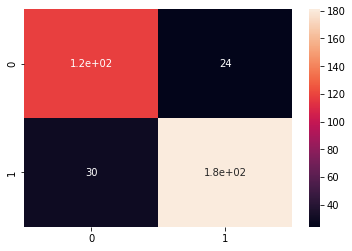

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict_test=ADABoostClassification.predict(X_testSelectedFeature)
cm1=confusion_matrix(y_test,y_predict_test)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y_predict_test))

AUC KNN:  0.9280755623790136


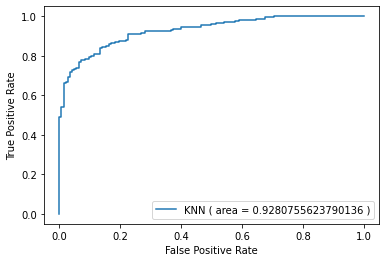

In [18]:
y_predictionKNN_proba=ADABoostClassification.predict_proba(X_testSelectedFeature)[:,1]
AUCKNN=metrics.roc_auc_score(y_test,y_predictionKNN_proba)
print("AUC KNN: ",AUCKNN)
fprAda, tprAda, thresholds = metrics.roc_curve(y_test,y_predictionKNN_proba)

plt.plot(fprAda,tprAda,label="KNN ( area = "+str(AUCKNN)+" )")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


In [19]:
prediction=ADABoostClassification.predict(X_testSelectedFeature)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  84.70254957507082


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       142
           1       0.92      0.86      0.89       211

    accuracy                           0.87       353
   macro avg       0.87      0.87      0.87       353
weighted avg       0.88      0.87      0.87       353



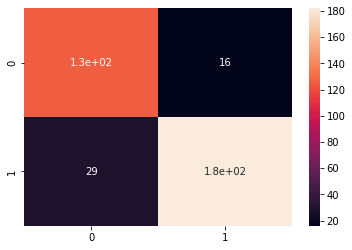

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
GradeintBoostClassification = GradientBoostingClassifier(loss='deviance',max_features=1,random_state=0,max_leaf_nodes=None)
GradeintBoostClassification.fit(X_trainSelectedFeatureAfterSMOTE,y_train)
y_predict=GradeintBoostClassification.predict(X_testSelectedFeature)

cm1=confusion_matrix(y_test,y_predict)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y_predict))

AUC KNN:  0.934767372004539


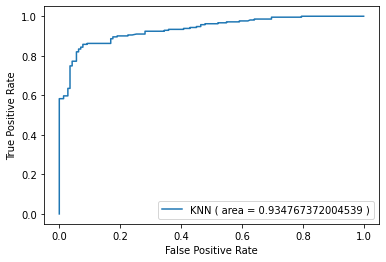

In [21]:
y_predictionKNN_proba=GradeintBoostClassification.predict_proba(X_testSelectedFeature)[:,1]
AUCKNN=metrics.roc_auc_score(y_test,y_predictionKNN_proba)
print("AUC KNN: ",AUCKNN)
fprGradientBoost, tprGradientBoost, thresholds = metrics.roc_curve(y_test,y_predictionKNN_proba)

plt.plot(fprGradientBoost,tprGradientBoost,label="KNN ( area = "+str(AUCKNN)+" )")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


In [22]:
prediction=GradeintBoostClassification.predict(X_testSelectedFeature)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  87.25212464589235


              precision    recall  f1-score   support

           0       0.83      0.89      0.86       142
           1       0.92      0.88      0.90       211

    accuracy                           0.88       353
   macro avg       0.87      0.88      0.88       353
weighted avg       0.88      0.88      0.88       353



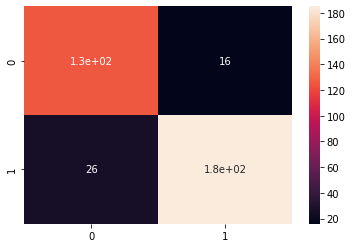

In [23]:
import xgboost as xgb
XGBoostClassification=xgb.XGBClassifier()
XGBoostClassification.fit(X_trainSelectedFeatureAfterSMOTE,y_train)


y_predictionXgBoost=XGBoostClassification.predict(X_testSelectedFeature)
from sklearn.metrics import classification_report,confusion_matrix
cm1=confusion_matrix(y_test,y_predictionXgBoost)
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y_predictionXgBoost))


AUC Voting:  0.9403077231159469


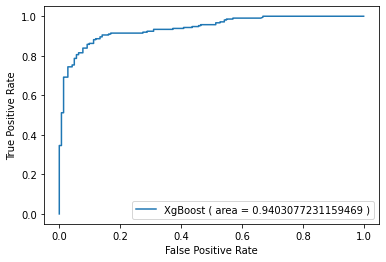

In [24]:
y_predictionXgB_proba=XGBoostClassification.predict_proba(X_testSelectedFeature)[:,1]
AUCXgB=metrics.roc_auc_score(y_test,y_predictionXgB_proba)
print("AUC Voting: ",AUCXgB)

fprXgB, tprXgB, thresholds = metrics.roc_curve(y_test,y_predictionXgB_proba)

plt.plot(fprXgB,tprXgB,label="XgBoost ( area = "+str(AUCXgB)+" )")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


In [25]:
prediction=XGBoostClassification.predict(X_testSelectedFeature)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  88.10198300283287


In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier

base_cls = MLPClassifier(random_state=0)

# no. of base classifier
num_trees = 30
seed = 15
# bagging classifier
bagClassificationMLP = BaggingClassifier(base_estimator=base_cls, n_estimators=num_trees, random_state=0)


In [27]:
bagClassificationMLP.fit(X_trainSelectedFeatureAfterSMOTE, y_train)
y_predictionBagMLP = bagClassificationMLP.predict(X_testSelectedFeature)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       142
           1       0.92      0.86      0.89       211

    accuracy                           0.87       353
   macro avg       0.87      0.87      0.87       353
weighted avg       0.88      0.87      0.87       353



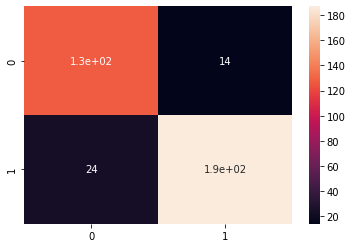

In [28]:
cm1=confusion_matrix(y_test,y_predictionBagMLP)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y_predict))

AUC Bagging with MLP:  0.9470996595687871


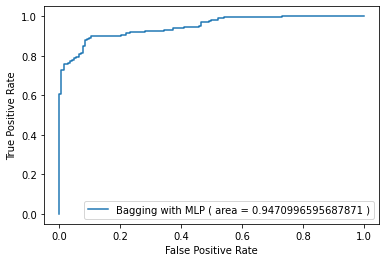

In [29]:
y_predictionBagMLP_proba=bagClassificationMLP.predict_proba(X_testSelectedFeature)[:,1]
AUCBAGMLP=metrics.roc_auc_score(y_test,y_predictionBagMLP_proba)
print("AUC Bagging with MLP: ",AUCBAGMLP)


fprBagMLP, tprBagMLP, thresholds = metrics.roc_curve(y_test,y_predictionBagMLP_proba)

plt.plot(fprBagMLP,tprBagMLP,label="Bagging with MLP ( area = "+str(AUCBAGMLP)+" )")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [30]:
prediction=bagClassificationMLP.predict(X_testSelectedFeature)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  89.23512747875354


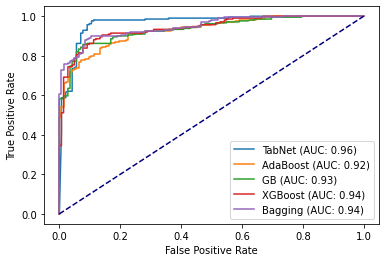

In [39]:
plt.figure()

#plt.plot(fprRBF,tprRBF,label="SVM (AUC: 0.95)")
plt.plot(fprKNN,tprKNN,label="TabNet (AUC: 0.96)")
#plt.plot(fprDT,tprDT,label="DT (AUC: 0.86)")
#plt.plot(fprRF,tprRF,label="RF (AUC: 0.90)")
plt.plot(fprAda,tprAda,label="AdaBoost (AUC: 0.92)")
#plt.plot(fprMLP,tprMLP,label="MLP (AUC: 0.96)")
plt.plot(fprGradientBoost,tprGradientBoost,label="GB (AUC: 0.93)")
plt.plot(fprXgB,tprXgB,label="XGBoost (AUC: 0.94)")
plt.plot(fprBagMLP,tprBagMLP,label="Bagging (AUC: 0.94)")


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.savefig('Without feature selection-SMOTE-ROCNew.png',dpi=1000)
plt.show()

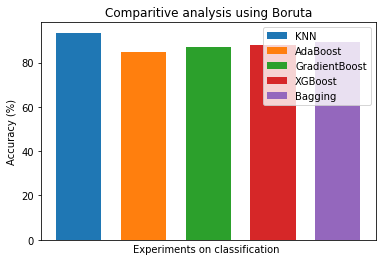

In [32]:
# Import Library
import numpy as np 
import matplotlib.pyplot as plt 

# Define Data
data3 = ['Boruta']
xvals = [93.48]
yvals = [84.70]
zvals = [87.25]
avals = [88.1]
bvals = [89.23]

x_axis = np.arange(len(data3))

# Multi bar Chart
plt.bar(x_axis +0.1, xvals, width=0.07, label = 'TabNet')
plt.bar(x_axis +0.1*2, yvals, width=0.07, label = 'AdaBoost')
plt.bar(x_axis +0.1*3, zvals, width=0.07, label = 'GradientBoost')
plt.bar(x_axis +0.1*4, avals, width=0.07, label = 'XGBoost')
plt.bar(x_axis +0.1*5, bvals, width=0.07, label = 'Bagging')

# Xticks
plt.xticks(x_axis,data3)
plt.ylabel("Accuracy (%)")
plt.xlabel("Experiments on classification ")
plt.title("Comparitive analysis using Boruta")
plt.legend()
plt.show()

In [33]:
X_train = X_trainSelectedFeatureAfterSMOTE.to_numpy()
y_train = y_train.to_numpy().squeeze()
X_test  = X_testSelectedFeature.to_numpy()

In [34]:
!pip install pytorch-tabnet
import numpy  as np
import pandas as pd
from pytorch_tabnet.tab_model import TabNetClassifier

classifier = TabNetClassifier(verbose=0,seed=42)
classifier.fit(X_train=X_train, y_train=y_train,
               patience=2,max_epochs=2000,
               eval_metric=['auc'])


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
No early stopping will be performed, last training weights will be used.


In [35]:
prediction=classifier.predict(X_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  93.48441926345609


AUC TabNet:  0.9661070689540084


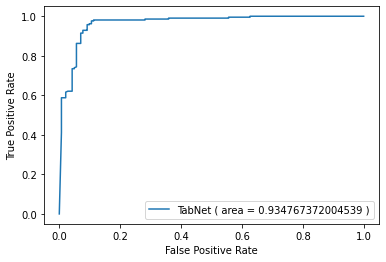

In [37]:
y_predictionKNN_proba=classifier.predict_proba(X_test)[:,1]
AUCTabNet=metrics.roc_auc_score(y_test,y_predictionKNN_proba)
print("AUC TabNet: ",AUCTabNet)
fprKNN, tprKNN, thresholds = metrics.roc_curve(y_test,y_predictionKNN_proba)

plt.plot(fprKNN,tprKNN,label="TabNet ( area = "+str(AUCKNN)+" )")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()
